In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Collection: Data loading and data joining (if necessary)

In [47]:
# Open csv file
file = 'Data/masterdatatoupload.csv'
df = pd.read_csv(file, encoding = 'latin1')
print(df.head())

    country                                     utility name utility code  \
0  Paraguay  ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).         ANDE   
1  Paraguay  ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).         ANDE   
2  Paraguay  ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).         ANDE   
3  Paraguay  ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).         ANDE   
4  Paraguay  ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).         ANDE   

  utility ID  year   Type of connection  \
0     209001  1994  Elec - Distribution   
1     209001  1995  Elec - Distribution   
2     209001  1996  Elec - Distribution   
3     209001  1997  Elec - Distribution   
4     209001  1998  Elec - Distribution   

   Total number of connections (residential and non-residential) in the utility area  \
0                                             589008                                   
1                                             710188                                   
2             

In [48]:
df = df.iloc[1:]

In [49]:
df.head()

,country,utility name,utility code,utility ID,year,Type of connection,Total number of connections (residential and non-residential) in the utility area,Total Number of residential connections in the utility area,Total electricity sold per year (MWh),Length of distribution network (km),...,Number of residential subscribers per 100 households in the concession area (Residential coverage) # / 100 households,Number of customer complaints per year,Average duration between customer complaint and the solution of the problem (hours),Average residential tariff (local nominal currency / MWh),Average industrial tariff (local nominal currency / MWh),Installation Cost (residential) local nominal currency,Installation Cost (Industrial) local nominal currency,Year of privatization,Residencial conexions per employee,Energy sold per employee
1,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1995,Elec - Distribution,710188,579691,3605894.515,33415.54,...,0.694,43333,NaN,95460,68920,NaN,NaN,0,222.1038314,1381.56878
2,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1996,Elec - Distribution,785280,647040,3802143.296,39952.04,...,0.747,45118,NaN,117960,85230,NaN,NaN,0,241.2527964,1417.652236
3,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1997,Elec - Distribution,850947,707179,3973477.997,45892.74,...,0.79,49173,NaN,135140,95020,NaN,NaN,0,256.7824982,1442.802468
4,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1998,Elec - Distribution,897494,749033,4079504.871,48422.2,...,0.816,49834,NaN,159890,110890,NaN,NaN,0,250.6803882,1365.296142
5,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1999,Elec - Distribution,856545,719159,4815296.785,50637.75,...,0.823,38173,NaN,161702.9087,98855.26838,NaN,NaN,0,240.2000668,1608.315559


In [50]:
# Create a dictionary comprehension to compress columns names
col_dict = {c[0]:c[1] for c in enumerate(df.columns)}
col_dict

{0: 'country',
 1: 'utility name',
 2: 'utility code',
 3: 'utility ID',
 4: 'year',
 5: 'Type of connection',
 6: ' Total number of connections (residential and non-residential) in the utility area',
 7: 'Total Number of residential connections in the utility area',
 8: 'Total electricity sold per year (MWh)',
 9: 'Length of distribution network (km) ',
 10: 'Total number of employees ',
 11: 'Average wholesale price paid per MWh (local nominal currency)',
 12: 'Average transmission charges per MWh purchased (local nominal currency)',
 13: 'OPEX (operation expenditures) of the distribution services (local nominal currency)',
 14: 'CAPEX (captial expenditures) of the distribution services (local nominal currency) ',
 15: 'TOTEX (total expenditures) of the distribution network (local nominal currency)',
 16: 'Energy losses in distribution per year (due to technical losses and illegal connections) %',
 17: 'Energy losses in distribution per year due to technical losses %',
 18: 'Energy l

In [59]:
# Condense column names
new_cols = {col_dict[1]:'utility_name',col_dict[2]:'utility_code',col_dict[3]:'utility_ID',col_dict[5]:'connection_type',
           col_dict[6]:'total_number_connections',col_dict[7]:'residential_connections',col_dict[8]:'electricity_sold_year_MWh',
           col_dict[9]:'distribution_length_km', col_dict[10]:'num_employees',col_dict[11]:'avg_price_MWh_local', 
            col_dict[12]:'avg_transmission_charge_MWh_local',col_dict[13]:'OPEX_local',col_dict[14]:'CAPEX_local',
           col_dict[15]:'TOTEX_local',col_dict[16]:'energy_losses_technical&nontechnical_%',col_dict[17]:'energy_losses_technical_%',
           col_dict[18]:'energy_losses_nontechnical_%',col_dict[19]:'avg_duration_interruptions_suscriber',
           col_dict[20]:'avg_frequency_interruptions_subscriber',col_dict[21]:'residential_coverage (#/100 households)', 
           col_dict[22]:'complaints_year', col_dict[23]:'avg_duration_solution_hr',col_dict[24]:'avg_residential_tarif_local',
           col_dict[25]:'avg_industrial_tarif_local', col_dict[26]:'installation_cost_residential_local', 
            col_dict[27]:'installation_cost_industrial_local', col_dict[28]:'privatization_year',col_dict[29]:'residential_connections_employee',
           col_dict[30]:'energy_sold_employee'}
df.rename(columns = new_cols, inplace = True)
df.columns

Index(['country', 'utility_name', 'utility_code', 'utility_ID', 'year',
       'connection_type', 'total_number_connections',
       'residential_connections', 'electricity_sold_year_MWh',
       'distribution_length_km', 'num_employees', 'avg_price_MWh_local',
       'avg_transmission_charge_MWh_local', 'OPEX_local', 'CAPEX_local',
       'TOTEX_local', 'energy_losses_technical&nontechnical_%',
       'energy_losses_technical_%', 'energy_losses_nontechnical_%',
       'avg_duration_interruptions_suscriber',
       'avg_frequency_interruptions_subscriber',
       'residential_coverage (#/100 households)', 'complaints_year',
       'avg_duration_solution_hr', 'avg_residential_tarif_local',
       'avg_industrial_tarif_local', 'installation_cost_residential_local',
       'installation_cost_industrial_local', 'privatization_year',
       'residential_connections_employee', 'energy_sold_employee'],
      dtype='object')

In [60]:
# Explore available data for one country = Ecuador
df[df.country == "Ecuador"].T

,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,...,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320
country,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,...,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador
utility_name,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,CORPORACION PARA LA ADMINISTRACION TEMPORAL EL...,...,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.,EMPRESA ELECTRICA SUCUMBIOS S.A.
utility_code,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,CATEG-D / EMELEC,...,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS,SUCUMBÍOS
utility_ID,201014,201014,201014,201014,201014,201014,201014,201014,201014,201014,...,201009,201009,201009,201009,201009,201009,201009,201009,201009,201009
year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
connection_type,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,...,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution,Elec - Distribution
total_number_connections,NaN,291939.8333,307648.6667,316647.4167,322363.25,330175.3333,335676,340595.3333,355018,382642,...,15741.66667,17663.33333,19161,21026.83333,22565,25003,28656,33133.41667,37747,42950
residential_connections,NaN,246650.6667,258077.5833,265536.9167,271161.6667,278947.75,283521,287457,299240,324334,...,11897.08333,13441.41667,14615,16131.33333,17274,18951,21967,25885,31259,34173
electricity_sold_year_MWh,NaN,2092213,2191943.5,2415720.5,2418859.4,2285527.095,2253741.246,2246710.882,2302288.161,2397103.971,...,41633.4,38900.824,39390.747,38995.186,46038.55173,53431.82403,65011.88545,77661.95224,87921,88538
distribution_length_km,NaN,NaN,NaN,NaN,NaN,8079.418,11630.62,3683.623,3867.705217,3960.533452,...,NaN,1755,1793.26,1793.26,93,725.49,3293.70563,1497.351524,1497.36,4024.1


In [61]:
# Amount of individual countries
df['country'].value_counts()

Brazil                            1036
Chile                              613
Argentina                          575
Colombia                           327
Peru                               297
Ecuador                            280
Venezuela                          171
Bolivia                            143
Costa Rica                         112
El Salvador                         90
Perú                                65
Panama                              54
Guatemala                           54
Republica Dominicana                39
Nicaragua                           36
Mexico                              30
Paraguay                            24
St Kitts and Nevis                  16
Uruguay                             16
Belize                              16
Honduras                            13
Jamaica                             13
Haiti                               12
St Vincent and the Grenadines        8
Dominica                             8
St Lucia                 

In [62]:
# Analyze utility names
df['utility_name'].unique()

array(['ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).',
       'ADMINISTRACION NACIONAL DE USINAS Y TRANSMISIONES ELECTRICAS ',
       'ADMINISTRACION PROVINCIAL DE ENERGIA DE LA PAMPA',
       'AES CLESA Y COMPAÑÍA, S. EN C. DE C.V.',
       'AES SUL DISTRIBUIDORA GAÚCHA DE ENERGIA S/A',
       'ANTIGUA PUBLIC UTILITIES AUTHORITY', 'BANDEIRANTE ENERGIA S/A.',
       'BELIZE ELECTRICITY LIMITED ', 'BOA VISTA ENERGIA S.A.',
       'C.A. ELECTRICIDAD DE GUARENAS Y GUATIRE',
       'C.A. ELECTRICIDAD DE VALENCIA ',
       'C.A. ENERGIA ELECTRICA DE BARQUISIMETO',
       'C.A. ENERGÍA ELECTRICA DE VENEZUELA ',
       'C.A. LA ELECTRICIDAD DE CIUDAD BOLIVAR',
       'C.A. LUZ ELECTRICA DE VENEZUELA',
       'C.V.G. ELECTRIFICACION DEL CARONI C.A. CARACAS ',
       'CA COMPAÑÍA LUZ ELECTRICA DEL YARACUY',
       'CA LUZ Y FUERZA DE PUERTO CABELLO',
       'CAIUA SERVIÇOS DE ELETRICIDADE S/A.',
       'CENTRAIS ELETRICAS DE CARAZINHO S/A.',
       'CENTRAIS ELETRICAS DE RONDÔNIA S/A',
     

In [63]:
# Clean up names
df['utility_name'] = df['utility_name'].str.upper()
df['utility_name'].unique()

array(['ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).',
       'ADMINISTRACION NACIONAL DE USINAS Y TRANSMISIONES ELECTRICAS ',
       'ADMINISTRACION PROVINCIAL DE ENERGIA DE LA PAMPA',
       'AES CLESA Y COMPAÑÍA, S. EN C. DE C.V.',
       'AES SUL DISTRIBUIDORA GAÚCHA DE ENERGIA S/A',
       'ANTIGUA PUBLIC UTILITIES AUTHORITY', 'BANDEIRANTE ENERGIA S/A.',
       'BELIZE ELECTRICITY LIMITED ', 'BOA VISTA ENERGIA S.A.',
       'C.A. ELECTRICIDAD DE GUARENAS Y GUATIRE',
       'C.A. ELECTRICIDAD DE VALENCIA ',
       'C.A. ENERGIA ELECTRICA DE BARQUISIMETO',
       'C.A. ENERGÍA ELECTRICA DE VENEZUELA ',
       'C.A. LA ELECTRICIDAD DE CIUDAD BOLIVAR',
       'C.A. LUZ ELECTRICA DE VENEZUELA',
       'C.V.G. ELECTRIFICACION DEL CARONI C.A. CARACAS ',
       'CA COMPAÑÍA LUZ ELECTRICA DEL YARACUY',
       'CA LUZ Y FUERZA DE PUERTO CABELLO',
       'CAIUA SERVIÇOS DE ELETRICIDADE S/A.',
       'CENTRAIS ELETRICAS DE CARAZINHO S/A.',
       'CENTRAIS ELETRICAS DE RONDÔNIA S/A',
     

In [11]:
df1 = df.apply(pd.to_numeric, args=('coerce',))
print(df1)

      country  utility name  utility code  utility ID  year  \
1         NaN           NaN           NaN    201001.0  1994   
2         NaN           NaN           NaN    201001.0  1995   
3         NaN           NaN           NaN    201001.0  1996   
4         NaN           NaN           NaN    201001.0  1997   
5         NaN           NaN           NaN    201001.0  1998   
...       ...           ...           ...         ...   ...   
4069      NaN           NaN           NaN    208013.0  2002   
4070      NaN           NaN           NaN    208013.0  2003   
4071      NaN           NaN           NaN    208013.0  2004   
4072      NaN           NaN           NaN    208013.0  2005   
4073      NaN           NaN           NaN    208013.0  2006   

      Type of connection  \
1                    NaN   
2                    NaN   
3                    NaN   
4                    NaN   
5                    NaN   
...                  ...   
4069                 NaN   
4070               

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 1 to 4073
Data columns (total 31 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   country                                                                                                                4073 non-null   object
 1   utility name                                                                                                           0 non-null      object
 2   utility code                                                                                                           4073 non-null   object
 3   utility ID                                                                                                             4064 non-null   object
 4   year  

In [64]:
energy_data = df

In [65]:
ED_utility = energy_data.groupby('country')['utility_name'].value_counts()
print(ED_utility)

country               utility_name                                          
Antigua and Barbuda   ANTIGUA PUBLIC UTILITIES AUTHORITY                         8
Argentina             EMPRESA DISTRIBUIDORA SUR S.A.                            22
                      EMPRESA DISTRIBUIDORA Y COMERCIALIZADORA NORTE S.A.       21
                      EMPRESA DISTRIBUIDORA DE ENERGIA LA PLATA S.A.            17
                      EMPRESA DE DISTRIBUICION ELECTRICA DE TUCUMAN S.A.        16
                                                                                ..
Venezuela             CA LUZ Y FUERZA DE PUERTO CABELLO                         13
                      COMPAÑÍA ANONIMA DE ADMINISTRACION Y FOMENTO ELECTRICO    13
                      ENERGIA ELECTRICA DE LA COSTA ORIENTAL                    13
                      SISTEMA ELECTRICO DEL ESTADO NUEVA ESPARTA                13
country               NAME                                                       1
Name: util

## Data Cleaning

### Analysis of Null values

In [66]:
missing = pd.concat([energy_data.isnull().sum(), 100 * energy_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= ['count','%'], ascending=False)

,count,%
installation_cost_industrial_local,3921,96.268107
avg_duration_solution_hr,3738,91.775104
installation_cost_residential_local,3661,89.884606
avg_transmission_charge_MWh_local,3577,87.822244
energy_losses_nontechnical_%,3524,86.520992
complaints_year,3524,86.520992
energy_losses_technical_%,3520,86.422784
avg_price_MWh_local,3256,79.941075
CAPEX_local,2931,71.961699
avg_frequency_interruptions_subscriber,2792,68.548981


In [67]:
# Drop columns with more than 90% of missing values
energy_data.drop(['avg_duration_solution_hr','installation_cost_industrial_local'], axis=1)


,country,utility_name,utility_code,utility_ID,year,connection_type,total_number_connections,residential_connections,electricity_sold_year_MWh,distribution_length_km,...,avg_duration_interruptions_suscriber,avg_frequency_interruptions_subscriber,residential_coverage (#/100 households),complaints_year,avg_residential_tarif_local,avg_industrial_tarif_local,installation_cost_residential_local,privatization_year,residential_connections_employee,energy_sold_employee
1,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1995,Elec - Distribution,710188,579691,3605894.515,33415.54,...,8.34,17.78,0.694,43333,95460,68920,NaN,0,222.1038314,1381.56878
2,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1996,Elec - Distribution,785280,647040,3802143.296,39952.04,...,18.85,17.29,0.747,45118,117960,85230,NaN,0,241.2527964,1417.652236
3,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1997,Elec - Distribution,850947,707179,3973477.997,45892.74,...,12.65,18.15,0.79,49173,135140,95020,NaN,0,256.7824982,1442.802468
4,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1998,Elec - Distribution,897494,749033,4079504.871,48422.2,...,17.07,21.94,0.816,49834,159890,110890,NaN,0,250.6803882,1365.296142
5,Paraguay,ADMINISTRACION NACIONAL DE ELECTRICIDAD (ANDE).,ANDE,209001,1999,Elec - Distribution,856545,719159,4815296.785,50637.75,...,7.13,13.32,0.823,38173,161702.9087,98855.26838,NaN,0,240.2000668,1608.315559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,Brazil,USINA HIDROELETRICA DE NOVA PALMA,NOVAPALMA,90445,2003,Elec - Distribution,NaN,NaN,NaN,NaN,...,19.35,22.34,NaN,NaN,232.64,NaN,NaN,1,NaN,NaN
4070,Brazil,USINA HIDROELETRICA DE NOVA PALMA,NOVAPALMA,90445,2004,Elec - Distribution,NaN,NaN,NaN,NaN,...,19.3,24.59,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4071,Brazil,USINA HIDROELETRICA DE NOVA PALMA,NOVAPALMA,90445,2005,Elec - Distribution,NaN,NaN,NaN,NaN,...,24.84,25.15,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4072,Brazil,USINA HIDROELETRICA DE NOVA PALMA,NOVAPALMA,90445,2006,Elec - Distribution,13250,7696,51,NaN,...,16.82,16.22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration

### Energy Sold Distribution by Country

Text(0.5, 0, 'Count')

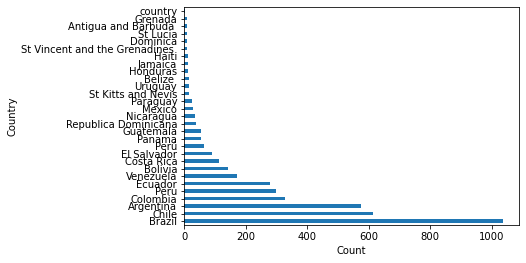

In [68]:
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
energy_data.country.value_counts().plot(kind='barh')
#Give the plot a helpful title of 'Country'
plt.ylabel('Country')
#Label the xaxis 'Count'
plt.xlabel('Count')

Brazil has the most amount of data

### Numerical Data Summary

In [69]:
energy_data.describe().T

,count,unique,top,freq
country,4073,29,Brazil,1036
utility_name,4073,263,CHILECTRA S.A.,35
utility_code,4073,258,EDESUR,35
utility_ID,4064,262,340,35
year,4073,37,2000,256
connection_type,4073,3,Elec - Distribution,4056
total_number_connections,2911,2867,n.d.,4
residential_connections,2929,2911,n.d.,8
electricity_sold_year_MWh,3195,3125,n.d,4
distribution_length_km,1436,1298,57.246,8


## Save The Cleaned Data

In [70]:
# save the data to a new csv file
energy_data.to_csv('Data/energy_data_cleaned.csv')